# Load LeNet Model
- some famous models have already been distributed together with the package
- we provide some tools to look into the models

In [1]:
%pylab inline
from tfs.models import LeNet
net = LeNet()

Populating the interactive namespace from numpy and matplotlib


# Build the network
- before we use the network object, we need to `build()` it first. 
- by default, any network object only contains definitions about the network.  we need to call build() function to construct the computational graph.

In [2]:
netout = net.build()
print netout

Tensor("prob:0", shape=(?, 10), dtype=float32)


# Explore the network object

- we can see the network structure easily

In [3]:
print net

Name:conv1     	Type:Conv2d(knum=20,ksize=[5, 5],strides=[1, 1],padding=VALID,activation=None)
Name:pool1     	Type:MaxPool(ksize=[2, 2],strides=[2, 2])
Name:conv2     	Type:Conv2d(knum=50,ksize=[5, 5],strides=[1, 1],padding=VALID,activation=relu)
Name:pool2     	Type:MaxPool(ksize=[2, 2],strides=[2, 2])
Name:ip1       	Type:FullyConnect(outdim=500,activation=relu)
Name:ip2       	Type:FullyConnect(outdim=10,activation=None)
Name:prob      	Type:Softmax()


In [4]:
print net.print_shape()

conv1                       (?, 28, 28, 1) -> (?, 24, 24, 20)     
pool1                      (?, 24, 24, 20) -> (?, 12, 12, 20)     
conv2                      (?, 12, 12, 20) -> (?, 8, 8, 50)       
pool2                        (?, 8, 8, 50) -> (?, 4, 4, 50)       
ip1                          (?, 4, 4, 50) -> (?, 500)            
ip2                               (?, 500) -> (?, 10)             
prob                               (?, 10) -> (?, 10)             
None


- each network object also has the following components binding with it:
  - initializer
  - loss
  - optimizer

In [5]:
print net.initializer

DefaultInitializer
-----param-----
print_names=[]
-----nodes-----
conv1
    conv1/weights:0     xavier(seed=None,uniform=True,mode=FAN_AVG,factor=1.0)
    conv1/biases:0      constant(val=0.1)
pool1
conv2
    conv2/biases:0      constant(val=0.1)
    conv2/weights:0     xavier(seed=None,uniform=True,mode=FAN_AVG,factor=1.0)
pool2
ip1
    ip1/weights:0       xavier(seed=None,uniform=True,mode=FAN_AVG,factor=1.0)
    ip1/biases:0        constant(val=0.1)
ip2
    ip2/biases:0        constant(val=0.1)
    ip2/weights:0       xavier(seed=None,uniform=True,mode=FAN_AVG,factor=1.0)
prob


In [6]:
print net.losser

CrossEntropyByLogitLabel (ip2)
-----param-----
----------------


In [7]:
print net.optimizer

AdamOptimizer
-----param-----
learning_rate=0.001,print_names=['learning_rate']
---------------


# Load and explore the data
- after we have construct the model, what we need to do next is to load data.
- our package has provided some frequently used dataset, such as Mnist, and Cifar10

In [8]:
from tfs.dataset import Mnist
dataset = Mnist()

- we can explore the image inside the mnist dataset

index: 15267 	label: 8


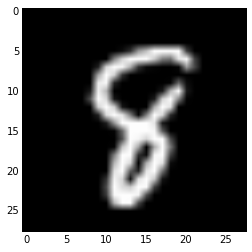

In [9]:
import numpy as np
idx = np.random.randint(0,60000) # we have 60000 images in the training dataset
img = dataset.train.data[idx,:,:,0]
lbl = dataset.train.labels[idx]
imshow(img,cmap='gray')
print 'index:',idx,'\t','label:',lbl

# Train the network
- It's very easy to train a network, just use `fit` function, which is a bit like `sklearn`
- If you want to record some information during training, you can define a monitor, and plug it onto the network
- The default monitor would only print some information every 10 steps.

In [10]:
net.monitor

{'default': DefaultMonitor(net,interval=10)}

- now we change the print step to 20, and add a monitor that record the variance of each layer's input and output.

In [11]:
from tfs.core.monitor import *
net.monitor['default'].interval=20
net.monitor['var'] = LayerInputVarMonitor(net,interval=10)

In [12]:
net.fit(dataset,batch_size=200,n_epoch=1)

step 20. loss 1.098543, score:0.658100
step 40. loss 0.531730, score:0.871900
step 60. loss 0.219297, score:0.908900
step 80. loss 0.342844, score:0.932400
step 100. loss 0.135898, score:0.937200
step 120. loss 0.117133, score:0.946900
step 140. loss 0.105653, score:0.950800
step 160. loss 0.132236, score:0.960400
step 180. loss 0.120563, score:0.960900
step 200. loss 0.098443, score:0.964700
step 220. loss 0.114411, score:0.962100
step 240. loss 0.137687, score:0.967600
step 260. loss 0.098422, score:0.959500
step 280. loss 0.081980, score:0.963300
step 300. loss 0.155365, score:0.967500


In [13]:
var_result = net.monitor['var'].results

In [14]:
import pandas as pd
var = pd.DataFrame(var_result,columns=[n.name for n in net.nodes])

In [15]:
var

,conv1,pool1,conv2,pool2,ip1,ip2,prob
0,6425.205566,527.632751,497.298126,7.225351,20.448353,9.782156,44.238594
1,5865.723145,500.731506,483.666107,1.052093,3.352211,1.436034,4.778584
2,6403.899414,534.200623,511.890228,1.459395,4.514973,2.017583,8.937464
3,6754.935547,576.536499,549.973694,3.419768,10.018423,4.530115,26.683338
4,5987.695312,517.822144,493.349670,2.546921,7.526064,3.493712,23.610308
5,6173.811523,515.226868,491.419403,3.003618,8.732905,4.038671,21.889585
6,5914.882324,501.554108,479.464783,2.791000,8.282437,3.838466,23.294497
7,6053.884766,501.749115,478.366608,3.590404,10.314008,4.875860,31.559923
8,5786.568359,482.805786,458.693237,3.056173,8.839657,4.102325,26.738495
9,6716.635742,570.340820,542.512756,3.370234,9.593591,4.488956,30.924175
